In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('../communal/Ames_Housing_Price_Data_cleaned.csv', header = [0])

pd.set_option("display.max_columns", None)

df.head(5)

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,lot_bucket,mean_LotFrontage
0,1,909176150,856,126000,30,RL,64.9,7890,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,None,None,None,0,3,2010,WD,Normal,"(7298.458, 8298.201]",64.939130
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,None,None,None,0,2,2009,WD,Normal,"(3299.486, 4299.229]",46.154930
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,None,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,None,None,None,0,11,2007,WD,Normal,"(5298.972, 6298.715]",54.060150
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,None,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,None,None,None,0,5,2009,WD,Normal,"(7298.458, 8298.201]",64.939130
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,None,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,None,None,None,0,11,2009,WD,Normal,"(8298.201, 9297.944]",68.724832


In [2]:
numerical_columns = ['GrLivArea', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 
                    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                    '2ndFlrSF', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                    '3SsnPorch', 'ScreenPorch', 'PoolArea']

categorical_columns = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                      'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType',
                      'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                      'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                      'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
                      'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                      'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
                      'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
                      'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
                      'SaleCondition']

In [10]:
for el in numerical_columns:
    x_y = sns.scatterplot(data = df, x = el, y = 'SalePrice')
    x_y.set_ylabel('SalePrice')
    plt.savefig('numerical/x_y/{x_axis}.png'.format(x_axis = el), dpi = 300)
    plt.clf()
    
    x_logy = sns.scatterplot(data = df, x = el, y = 'SalePrice')
    x_logy.set_yscale('log')
    x_logy.set_ylabel('log(SalePrice)')
    plt.savefig('numerical/x_logy/{x_axis}.png'.format(x_axis = el), dpi = 300)
    plt.clf()
    
    logx_logy = sns.scatterplot(data = df, x = el, y = 'SalePrice')
    logx_logy.set_xscale('log')
    logx_logy.set_yscale('log')
    plt.savefig('numerical/logx_logy/{x_axis}.png'.format(x_axis = el), dpi = 300)
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [6]:
for el in categorical_columns:
    x_y = sns.boxplot(data = df, x = el, y = 'SalePrice')
    plt.savefig('categorical/x_y/{x_axis}.png'.format(x_axis = el), dpi = 300)
    plt.clf()
    
    x_logy = sns.boxplot(data = df, x = el, y = 'SalePrice')
    x_logy.set_yscale('log')
    plt.savefig('categorical/x_logy/{x_axis}.png'.format(x_axis = el), dpi = 300)
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [7]:
for col in df.columns:
    sns.histplot(data = df, x = col)
    plt.savefig('histograms/{feature}.png'.format(feature = col), dpi = 300)
    plt.clf()

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

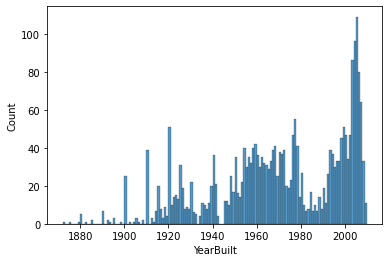

In [6]:
sns.histplot(data = df, x = 'YearBuilt', binwidth = 1)

In [8]:
#Making figures with stacked boxplots/histograms for categorical variables.
for el in categorical_columns:
    fig, axes = plt.subplots(2, 1, figsize = (18, 14))
    sns.boxplot(ax = axes[0], data = df, x = el, y = 'SalePrice')
    sns.histplot(ax = axes[1], data = df, x = el)
    plt.savefig('stacked_boxplots_histograms/{x_axis}.png'.format(x_axis = el), dpi = 300)
    plt.clf()

<ipython-input-8-ddf4278f7151>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 1, figsize = (18, 14))


<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

In [22]:
for el in categorical_columns:
    fig, axes = plt.subplots(2, 1, figsize = (18, 14))
    sns.boxplot(ax = axes[0], data = df, x = el, y = 'price_per_sqft')
    sns.histplot(ax = axes[1], data = df, x = el)
    plt.savefig('stacked_boxplots_histograms_per_sqft/{x_axis}.png'.format(x_axis = el), dpi = 300)
    plt.clf()

<ipython-input-22-145d49c1a2ff>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 1, figsize = (18, 14))


<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

<Figure size 1296x1008 with 0 Axes>

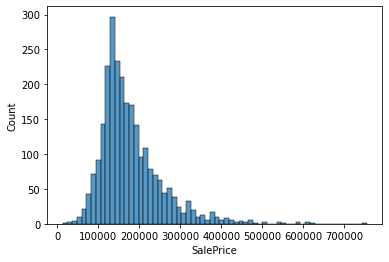

In [8]:
x = sns.histplot(data = df, x = 'SalePrice')

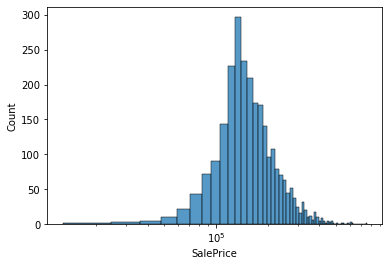

In [9]:
x = sns.histplot(data = df, x = 'SalePrice')
x.set_xscale('log')

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

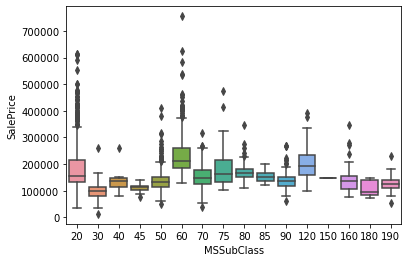

In [10]:
sns.boxplot(data = df, x = 'MSSubClass', y = 'SalePrice')

In [20]:
corr_matrix = df.corr()
top_10_with_price = corr_matrix['SalePrice'].sort_values(ascending = False)[1:11]
top_10_features = []
for feature in list(top_10_with_price.items()):
    top_10_features.append(feature[0])

corr_dict = {}
for feature in top_10_features:
    corr_dict[feature] = corr_matrix[feature].sort_values(ascending = False)[1:11]

In [21]:
corr_dict

{'OverallQual': SalePrice       0.790501
 GarageCars      0.581029
 YearBuilt       0.574400
 GrLivArea       0.559897
 YearRemodAdd    0.546297
 GarageArea      0.538261
 TotalBsmtSF     0.528648
 FullBath        0.508255
 1stFlrSF        0.454481
 MasVnrArea      0.401996
 Name: OverallQual, dtype: float64,
 'GrLivArea': TotRmsAbvGrd    0.807445
 SalePrice       0.719981
 2ndFlrSF        0.665001
 FullBath        0.643937
 OverallQual     0.559897
 1stFlrSF        0.539135
 BedroomAbvGr    0.538022
 GarageCars      0.493786
 GarageArea      0.476029
 Fireplaces      0.457926
 Name: GrLivArea, dtype: float64,
 'TotalBsmtSF': 1stFlrSF       0.784271
 SalePrice      0.652494
 OverallQual    0.528648
 BsmtFinSF1     0.512920
 GarageArea     0.465312
 GarageCars     0.435601
 BsmtUnfSF      0.422157
 GrLivArea      0.410370
 YearBuilt      0.401240
 MasVnrArea     0.360725
 Name: TotalBsmtSF, dtype: float64,
 '1stFlrSF': TotalBsmtSF         0.784271
 SalePrice           0.642613
 GrLivAre

In [19]:
corr_matrix = df.corr()
pos_corr_saleprice = corr_matrix['SalePrice'].sort_values(ascending = False)[:10]
neg_corr_saleprice = corr_matrix['SalePrice'].sort_values(ascending = True)[:10]
print(pos_corr_saleprice)
print(neg_corr_saleprice)

#sns.heatmap(corr_matrix, annot=True)
#plt.savefig('correlations.png')

SalePrice         1.000000
OverallQual       0.790501
GrLivArea         0.719981
TotalBsmtSF       0.652494
1stFlrSF          0.642613
GarageCars        0.638424
GarageArea        0.634669
price_per_sqft    0.575509
YearBuilt         0.544370
FullBath          0.534982
Name: SalePrice, dtype: float64
PID             -0.226276
EnclosedPorch   -0.123235
KitchenAbvGr    -0.113977
OverallCond     -0.101091
MSSubClass      -0.084587
BsmtHalfBath    -0.033786
LowQualFinSF    -0.030835
Unnamed: 0      -0.028413
MiscVal         -0.018877
YrSold          -0.001376
Name: SalePrice, dtype: float64


In [3]:
#histogram for each neighborhood of sale price and price/sq ft
df['price_per_sqft'] = round(df['SalePrice']/(df['1stFlrSF'] + df['2ndFlrSF'] ), 2)

In [13]:
for neighborhood in df['Neighborhood']:
    sns.histplot(data = df[df['Neighborhood'] == neighborhood], x = 'SalePrice', binwidth = 25000)
    plt.savefig('neighborhoods/sale_price/{nhood}.png'.format(nhood = neighborhood), dpi = 300)
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [17]:
for neighborhood in df['Neighborhood']:
    sns.histplot(data = df[df['Neighborhood'] == neighborhood], x = 'price_per_sqft', binwidth = 10)
    plt.savefig('neighborhoods/price_per_sqft/{nhood}.png'.format(nhood = neighborhood), dpi = 300)
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [10]:
#df['1st_2nd'] = df['1stFlrSF'] + df['2ndFlrSF']
#df['Bsmt_SF_1_2'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
#df['living_SF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']
#df['total'] = df['GrLivArea'] + df['TotalBsmtSF']

corr_matrix = df.corr()
pos_corr_saleprice = corr_matrix['SalePrice'].sort_values(ascending = False)
print(pos_corr_saleprice)

SalePrice           1.000000
living_SF           0.821729
total               0.819266
OverallQual         0.790501
1st_2nd             0.725657
GrLivArea           0.719981
TotalBsmtSF         0.652494
1stFlrSF            0.642613
GarageCars          0.638424
GarageArea          0.634669
YearBuilt           0.544370
FullBath            0.534982
YearRemodAdd        0.514309
MasVnrArea          0.498432
TotRmsAbvGrd        0.490219
Fireplaces          0.488184
BsmtFinSF1          0.461070
Bsmt_SF_1_2         0.444919
mean_LotFrontage    0.336274
WoodDeckSF          0.333232
LotFrontage         0.328277
OpenPorchSF         0.306540
BsmtFullBath        0.290755
HalfBath            0.285875
LotArea             0.274443
2ndFlrSF            0.263144
BsmtUnfSF           0.168060
BedroomAbvGr        0.151806
ScreenPorch         0.121463
3SsnPorch           0.031260
PoolArea            0.030844
BsmtFinSF2          0.022668
MoSold              0.012591
YrSold             -0.001376
MiscVal       